In [112]:
import pandas as pd
import datetime
import numpy as np
from sklearn.model_selection import train_test_split
from statsmodels.tsa.api import SimpleExpSmoothing
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error

In [133]:
df = pd.read_csv('../Datasets/AMD Historical Data.csv')
df

,Date,Price,Open,High,Low,Vol.,Change %
0,1/3/2017,11.43,11.42,11.65,11.02,55.18M,0.79%
1,1/4/2017,11.43,11.45,11.52,11.23,40.78M,0.00%
2,1/5/2017,11.24,11.43,11.69,11.23,38.86M,-1.66%
3,1/6/2017,11.32,11.29,11.49,11.11,34.45M,0.71%
4,1/9/2017,11.49,11.37,11.64,11.31,37.30M,1.50%
...,...,...,...,...,...,...,...
1606,5/22/2023,108.00,104.68,108.79,103.49,65.11M,2.06%
1607,5/23/2023,108.12,107.25,110.99,107.19,72.88M,0.11%
1608,5/24/2023,108.27,105.98,108.91,105.64,60.39M,0.14%
1609,5/25/2023,120.35,117.31,120.69,115.80,107.56M,11.16%


In [134]:
df.info

<bound method DataFrame.info of            Date   Price    Open    High     Low     Vol. Change %
0      1/3/2017   11.43   11.42   11.65   11.02   55.18M    0.79%
1      1/4/2017   11.43   11.45   11.52   11.23   40.78M    0.00%
2      1/5/2017   11.24   11.43   11.69   11.23   38.86M   -1.66%
3      1/6/2017   11.32   11.29   11.49   11.11   34.45M    0.71%
4      1/9/2017   11.49   11.37   11.64   11.31   37.30M    1.50%
...         ...     ...     ...     ...     ...      ...      ...
1606  5/22/2023  108.00  104.68  108.79  103.49   65.11M    2.06%
1607  5/23/2023  108.12  107.25  110.99  107.19   72.88M    0.11%
1608  5/24/2023  108.27  105.98  108.91  105.64   60.39M    0.14%
1609  5/25/2023  120.35  117.31  120.69  115.80  107.56M   11.16%
1610  5/26/2023  127.03  122.46  127.43  120.89   92.22M    5.55%

[1611 rows x 7 columns]>

In [135]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index value
df.set_index('Date', inplace=True)

In [136]:
print(df.index)

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2023-05-15', '2023-05-16', '2023-05-17', '2023-05-18',
               '2023-05-19', '2023-05-22', '2023-05-23', '2023-05-24',
               '2023-05-25', '2023-05-26'],
              dtype='datetime64[ns]', name='Date', length=1611, freq=None)


In [137]:
df.head(20)

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2017-01-03,11.43,11.42,11.65,11.02,55.18M,0.79%
2017-01-04,11.43,11.45,11.52,11.23,40.78M,0.00%
2017-01-05,11.24,11.43,11.69,11.23,38.86M,-1.66%
2017-01-06,11.32,11.29,11.49,11.11,34.45M,0.71%
2017-01-09,11.49,11.37,11.64,11.31,37.30M,1.50%
2017-01-10,11.44,11.55,11.63,11.33,29.20M,-0.44%
2017-01-11,11.20,11.39,11.41,11.15,39.38M,-2.10%
2017-01-12,10.76,10.98,11.04,10.33,75.24M,-3.93%
2017-01-13,10.58,10.79,10.87,10.56,38.38M,-1.67%


In [138]:
df = df[['Open']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [139]:
# Train the SES model and tune alpha using the validation dataset
best_alpha = None
best_mse = np.inf
for alpha in np.arange(0.1, 1.0, 0.1):
    model = SimpleExpSmoothing(train_data['Open']).fit(smoothing_level=alpha, optimized=False)
    y_pred = model.forecast(len(val_data))
    mse = mean_squared_error(val_data['Open'], y_pred)
    if mse < best_mse:
        best_mse = mse
        best_alpha = alpha

print("Best alpha value:", best_alpha)

Best alpha value: 0.1


In [140]:
# Training on the train set and testing on the test set
history = train_data.Open.tolist()
y_pred = []

for i in test_data.Open:
  model = SimpleExpSmoothing(history)
  model_fit = model.fit(smoothing_level = 0.7)
  prediction = model_fit.forecast()  
  y_pred.append(prediction[0])
  history.append(i)

In [141]:
# Using the train set and the test set for training, then predicting on the validation set
y_pred_val = []

for i in val_data.Open:
  model = SimpleExpSmoothing(history)
  model_fit = model.fit(smoothing_level = 0.7)
  prediction = model_fit.forecast()  
  y_pred_val.append(prediction[0])
  history.append(i)

In [23]:
model = SimpleExpSmoothing(train_data['Open']).fit(smoothing_level=best_alpha, optimized=False)

In [ ]:
# Regression metrics
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mse = mean_squared_error(ytest, y_pred)
test_mae = mean_absolute_error(ytest, y_pred)

valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
valid_mse = mean_squared_error(yval, y_pred_val)
valid_mae = mean_absolute_error(yval, y_pred_val)

print('Testing RMSE:', test_rmse)
print('Testing MSE:', test_mse)
print('Testing MAE:', test_mae)

print('Validation RMSE:', valid_rmse)
print('Validation MSE:', valid_rmse)
print('Validation MAE:', valid_mae)

In [142]:
print(type(last_date))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [143]:
# The process of creating index predict next 30 days

# Get the last date from the current index
last_date = df.index[-1]

# Convert type of "last_date" from int to datetime
last_date = pd.to_datetime(last_date)

# Add one day to the last date
next_date = last_date + pd.DateOffset(days=1)

# Create a list of indices starting from the next date for 30 days
index_next_30_days = pd.date_range(start=next_date, periods=30).tolist()

# Predict the closing prices for the next 30 days
y_next_30_days = []

for i in range(30):
  model = SimpleExpSmoothing(history)
  model_fit = model.fit(smoothing_level = best_alpha)
  prediction = model_fit.forecast()  
  y_next_30_days.append(prediction[0])
  history.append(prediction[0])

# Print the predicted closing prices for the next 30 days
print('Predicted opening prices for the next 30 days:')
print(y_next_30_days)

Predicted opening prices for the next 30 days:
[102.4280436143333, 102.4280436143333, 102.4280436143333, 102.4280436143333, 102.4280436143333, 102.4280436143333, 102.4280436143333, 102.4280436143333, 102.4280436143333, 102.4280436143333, 102.4280436143333, 102.4280436143333, 102.4280436143333, 102.4280436143333, 102.4280436143333, 102.4280436143333, 102.4280436143333, 102.4280436143333, 102.4280436143333, 102.4280436143333, 102.4280436143333, 102.4280436143333, 102.4280436143333, 102.4280436143333, 102.4280436143333, 102.4280436143333, 102.4280436143333, 102.4280436143333, 102.4280436143333, 102.4280436143333]


C:\Users\dinht\AppData\Local\Temp\ipykernel_8304\3062485101.py:10: UserWarning: Discarding nonzero nanoseconds in conversion.
  next_date = last_date + pd.DateOffset(days=1)


In [25]:
# Fit SES model to training and validation data with best alpha value
model = SimpleExpSmoothing(pd.concat([train_data['Open'], val_data['Open']])).fit(smoothing_level=best_alpha)

# Predict next 322 days (i.e., the length of the test set)
predictions = model.forecast(len(test_data))

# Evaluate model performance on test set
mse = mean_squared_error(test_data['Open'], predictions)
print("Mean squared error:", mse)

Mean squared error: 477.72918244777037


C:\Users\dinht\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dinht\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [46]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
next_30_days = model.predict(len(x_next_30_days))
print('Predicted closing prices for the next 30 days:')
print(next_30_days)

Predicted closing prices for the next 30 days:
30       12.282349
31       12.374114
32       12.461703
33       12.494533
34       12.586079
           ...    
1606     95.434612
1607     96.359151
1608     97.448236
1609     98.301412
1610    100.202271
Length: 1259, dtype: float64


In [55]:
next_1_days = model.forecast(30)
print(next_1_days)

1289    102.428044
1290    102.428044
1291    102.428044
1292    102.428044
1293    102.428044
1294    102.428044
1295    102.428044
1296    102.428044
1297    102.428044
1298    102.428044
1299    102.428044
1300    102.428044
1301    102.428044
1302    102.428044
1303    102.428044
1304    102.428044
1305    102.428044
1306    102.428044
1307    102.428044
1308    102.428044
1309    102.428044
1310    102.428044
1311    102.428044
1312    102.428044
1313    102.428044
1314    102.428044
1315    102.428044
1316    102.428044
1317    102.428044
1318    102.428044
dtype: float64


C:\Users\dinht\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


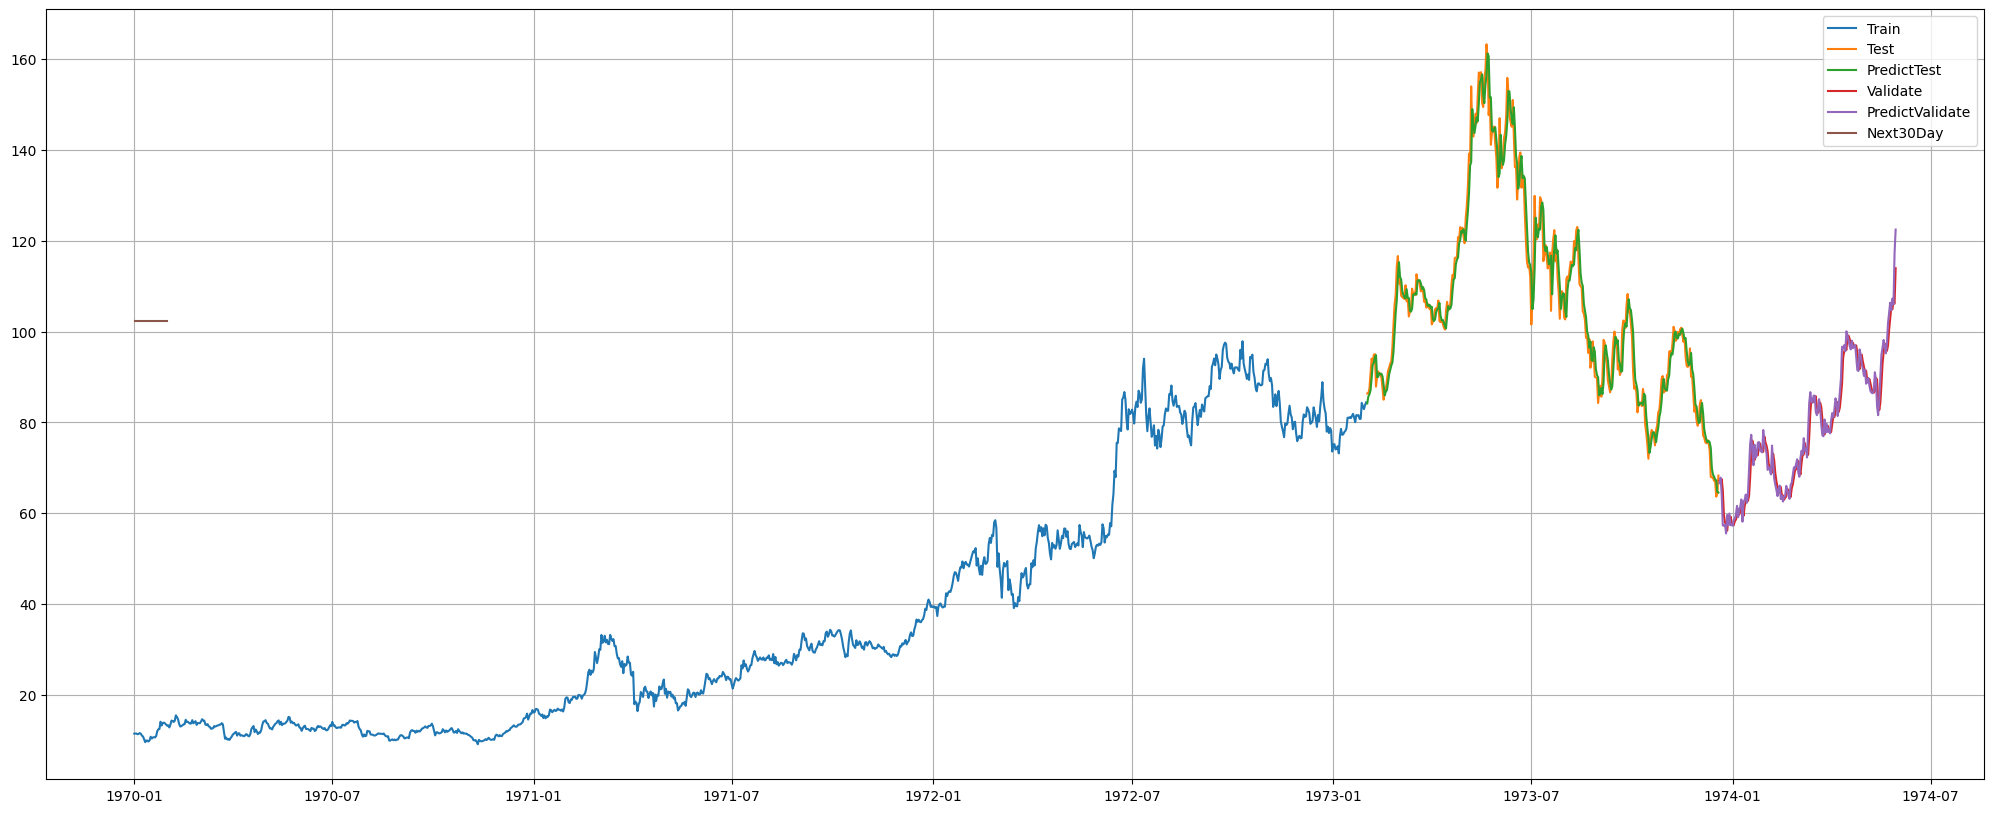

In [145]:
# Drawing
plt.figure(figsize=(25, 10))
plt.plot(df.index[:train_size], train_data)
plt.plot(df.index[train_size : train_size + test_size], test_data)
plt.plot(df.index[train_size : train_size + test_size], y_pred)
plt.plot(df.index[train_size + test_size :], y_pred_val)
plt.plot(df.index[train_size + test_size :], val_data)
plt.plot(index_next_30_days, y_next_30_days)
plt.legend(['Train', 'Test', 'PredictTest', 'Validate', 'PredictValidate', 'Next30Day'])
plt.grid()
# plt.savefig('SES_AMD.png')
plt.show()

In [146]:
print(df.index[:train_size], train_data)

RangeIndex(start=0, stop=1127, step=1)        Open
0     11.42
1     11.45
2     11.43
3     11.29
4     11.37
...     ...
1122  84.28
1123  83.49
1124  82.90
1125  83.83
1126  84.39

[1127 rows x 1 columns]


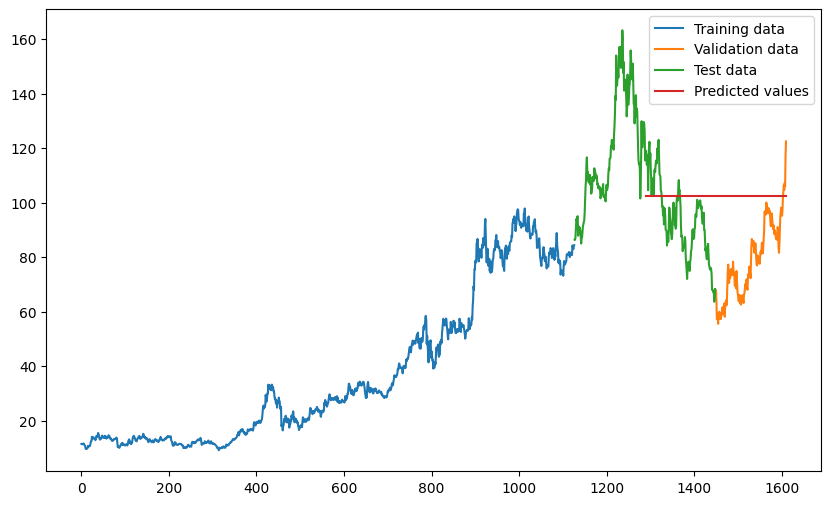

In [59]:
# Plot predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Open'], label='Training data')
plt.plot(val_data.index, val_data['Open'], label='Validation data')
plt.plot(test_data.index, test_data['Open'], label='Test data')
# plt.plot(last_data,next_30_days)
plt.plot(predictions.index, predictions, label='Predicted values')
# plt.plot(x_next_30_days.flatten(),next_30_days.values.ravel(), label='Predicted values for the next 30 days')
plt.legend()
plt.show()